Привет

Имеем 3 фрейма :  
visits (лог сервера с информацией о посещениях сайта):  
    Uid — уникальный идентификатор пользователя   
    Device — категория устройства пользователя  
    Start Ts — дата и время начала сессии  
    End Ts — дата и время окончания сессии  
    Source Id — идентификатор рекламного источника, из которого пришел пользователь  
orders (информация о заказах):  
    Uid — уникальный id пользователя, который сделал заказ  
    Buy Ts — дата и время заказа  
    Revenue — выручка Яндекс.Афиши с этого заказа  
costs (информация о затратах на маркетинг):  
    source_id — идентификатор рекламного источника  
    dt — дата  
    costs — затраты на этот рекламный источник в этот день    
Необходимо выполнить следующие действия :    
импортировать файлы;  
изучить данные в них;  
проверить типы данных на корректность;  
Построить  отчет и посчитать метрики :   
Продукт  
    Сколько людей пользуются в день, неделю, месяц?  
    Сколько сессий в день?  
    Сколько длится одна сессия?  
    Как часто люди возвращаются?  
Продажи   
    Когда люди начинают покупать?  
    Сколько раз покупают за период?  
    Какой средний чек?  
    Сколько денег приносят? (LTV)  
Маркетинг  
    Сколько денег потратили? Всего / на каждый источник / по времени  
    Сколько стоило привлечение одного покупателя из каждого источника?  
    На сколько окупились расходы? (ROI)  
Отобразить на графиках как метрики отличаются по  по устройствам и по рекламным источникам  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_visits = pd.read_csv('/datasets/visits_log.csv')
df_orders = pd.read_csv('/datasets/orders_log.csv')
df_costs = pd.read_csv('/datasets/costs.csv')

In [3]:
df_visits.info()
df_visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
df_orders.info()
df_orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [5]:
df_costs.info()
df_costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Все колонки имеющие в себе дату имеют не верный формат


In [6]:
df_visits['End Ts']= pd.to_datetime(df_visits['End Ts'])
df_visits['Start Ts']= pd.to_datetime(df_visits['Start Ts'])

In [7]:
df_orders['Buy Ts']= pd.to_datetime(df_orders['Buy Ts'])

In [8]:
df_costs['dt']= pd.to_datetime(df_costs['dt'])

Количество уникальных пользователей  в день/месяц/неделю

In [9]:
df_visits['session_year']  = df_visits['Start Ts'].dt.year
df_visits['session_month'] = df_visits['Start Ts'].dt.month
df_visits['session_week']  = df_visits['Start Ts'].dt.week
df_visits['session_date'] = df_visits['Start Ts'].dt.date

In [10]:
dau_total = df_visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total = df_visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
mau_total = df_visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()

In [11]:
print('Уникальных пользователей в день', int(dau_total) )
print('Уникальных пользователей в неделю', int(wau_total) )
print('Уникальных пользователей в месяц', int(mau_total) )

Уникальных пользователей в день 907
Уникальных пользователей в неделю 5716
Уникальных пользователей в месяц 23228


Количество сессий в день

In [12]:
sessions_per_user  = df_visits.groupby(['session_month', 'session_date']).agg({'Uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

In [13]:
print('Количество сессий в день',sessions_per_user['sessions_per_user'].mean())

Количество сессий в день 1.0821696440039719


Длительность одной сессии

In [14]:
df_visits['session_duration_sec'] = (df_visits['End Ts'] - df_visits['Start Ts']).dt.seconds
asl = df_visits['session_duration_sec'].mode()

In [15]:
print('Длительность одной сессии', asl)

Длительность одной сессии 0    60
dtype: int64


Средняя длительность одной сессии около 60 секунд



Посмотрим как часто люди возвращаются

In [16]:
first_activity_date = df_visits.groupby(['Uid'])['Start Ts'].min()
first_activity_date.name = 'first_activity_date'
df_visits = df_visits.join(first_activity_date,on='Uid')

In [17]:
df_visits['activity_week'] = pd.to_datetime(df_visits['Start Ts'], unit='d') - pd.to_timedelta(df_visits['Start Ts'].dt.dayofweek, unit='d')
df_visits['first_activity_week'] = pd.to_datetime(df_visits['first_activity_date'], unit='d') - pd.to_timedelta(df_visits['first_activity_date'].dt.dayofweek, unit='d')

In [18]:
df_visits['cohort_lifetime'] = df_visits['activity_week'] - df_visits['first_activity_week']
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'] / np.timedelta64(1,'W')
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'].round().astype(int)
df_visits['first_activity_week'] = df_visits['first_activity_week'].dt.strftime('%Y-%m')
cohorts = df_visits.groupby(['first_activity_week','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()

In [19]:
inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week','Uid']]
inital_users_count = inital_users_count.rename(columns={'Uid':'cohort_users'})
cohorts = cohorts.merge(inital_users_count,on='first_activity_week')

In [20]:
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']

Для наглядности выведем тепловую карту

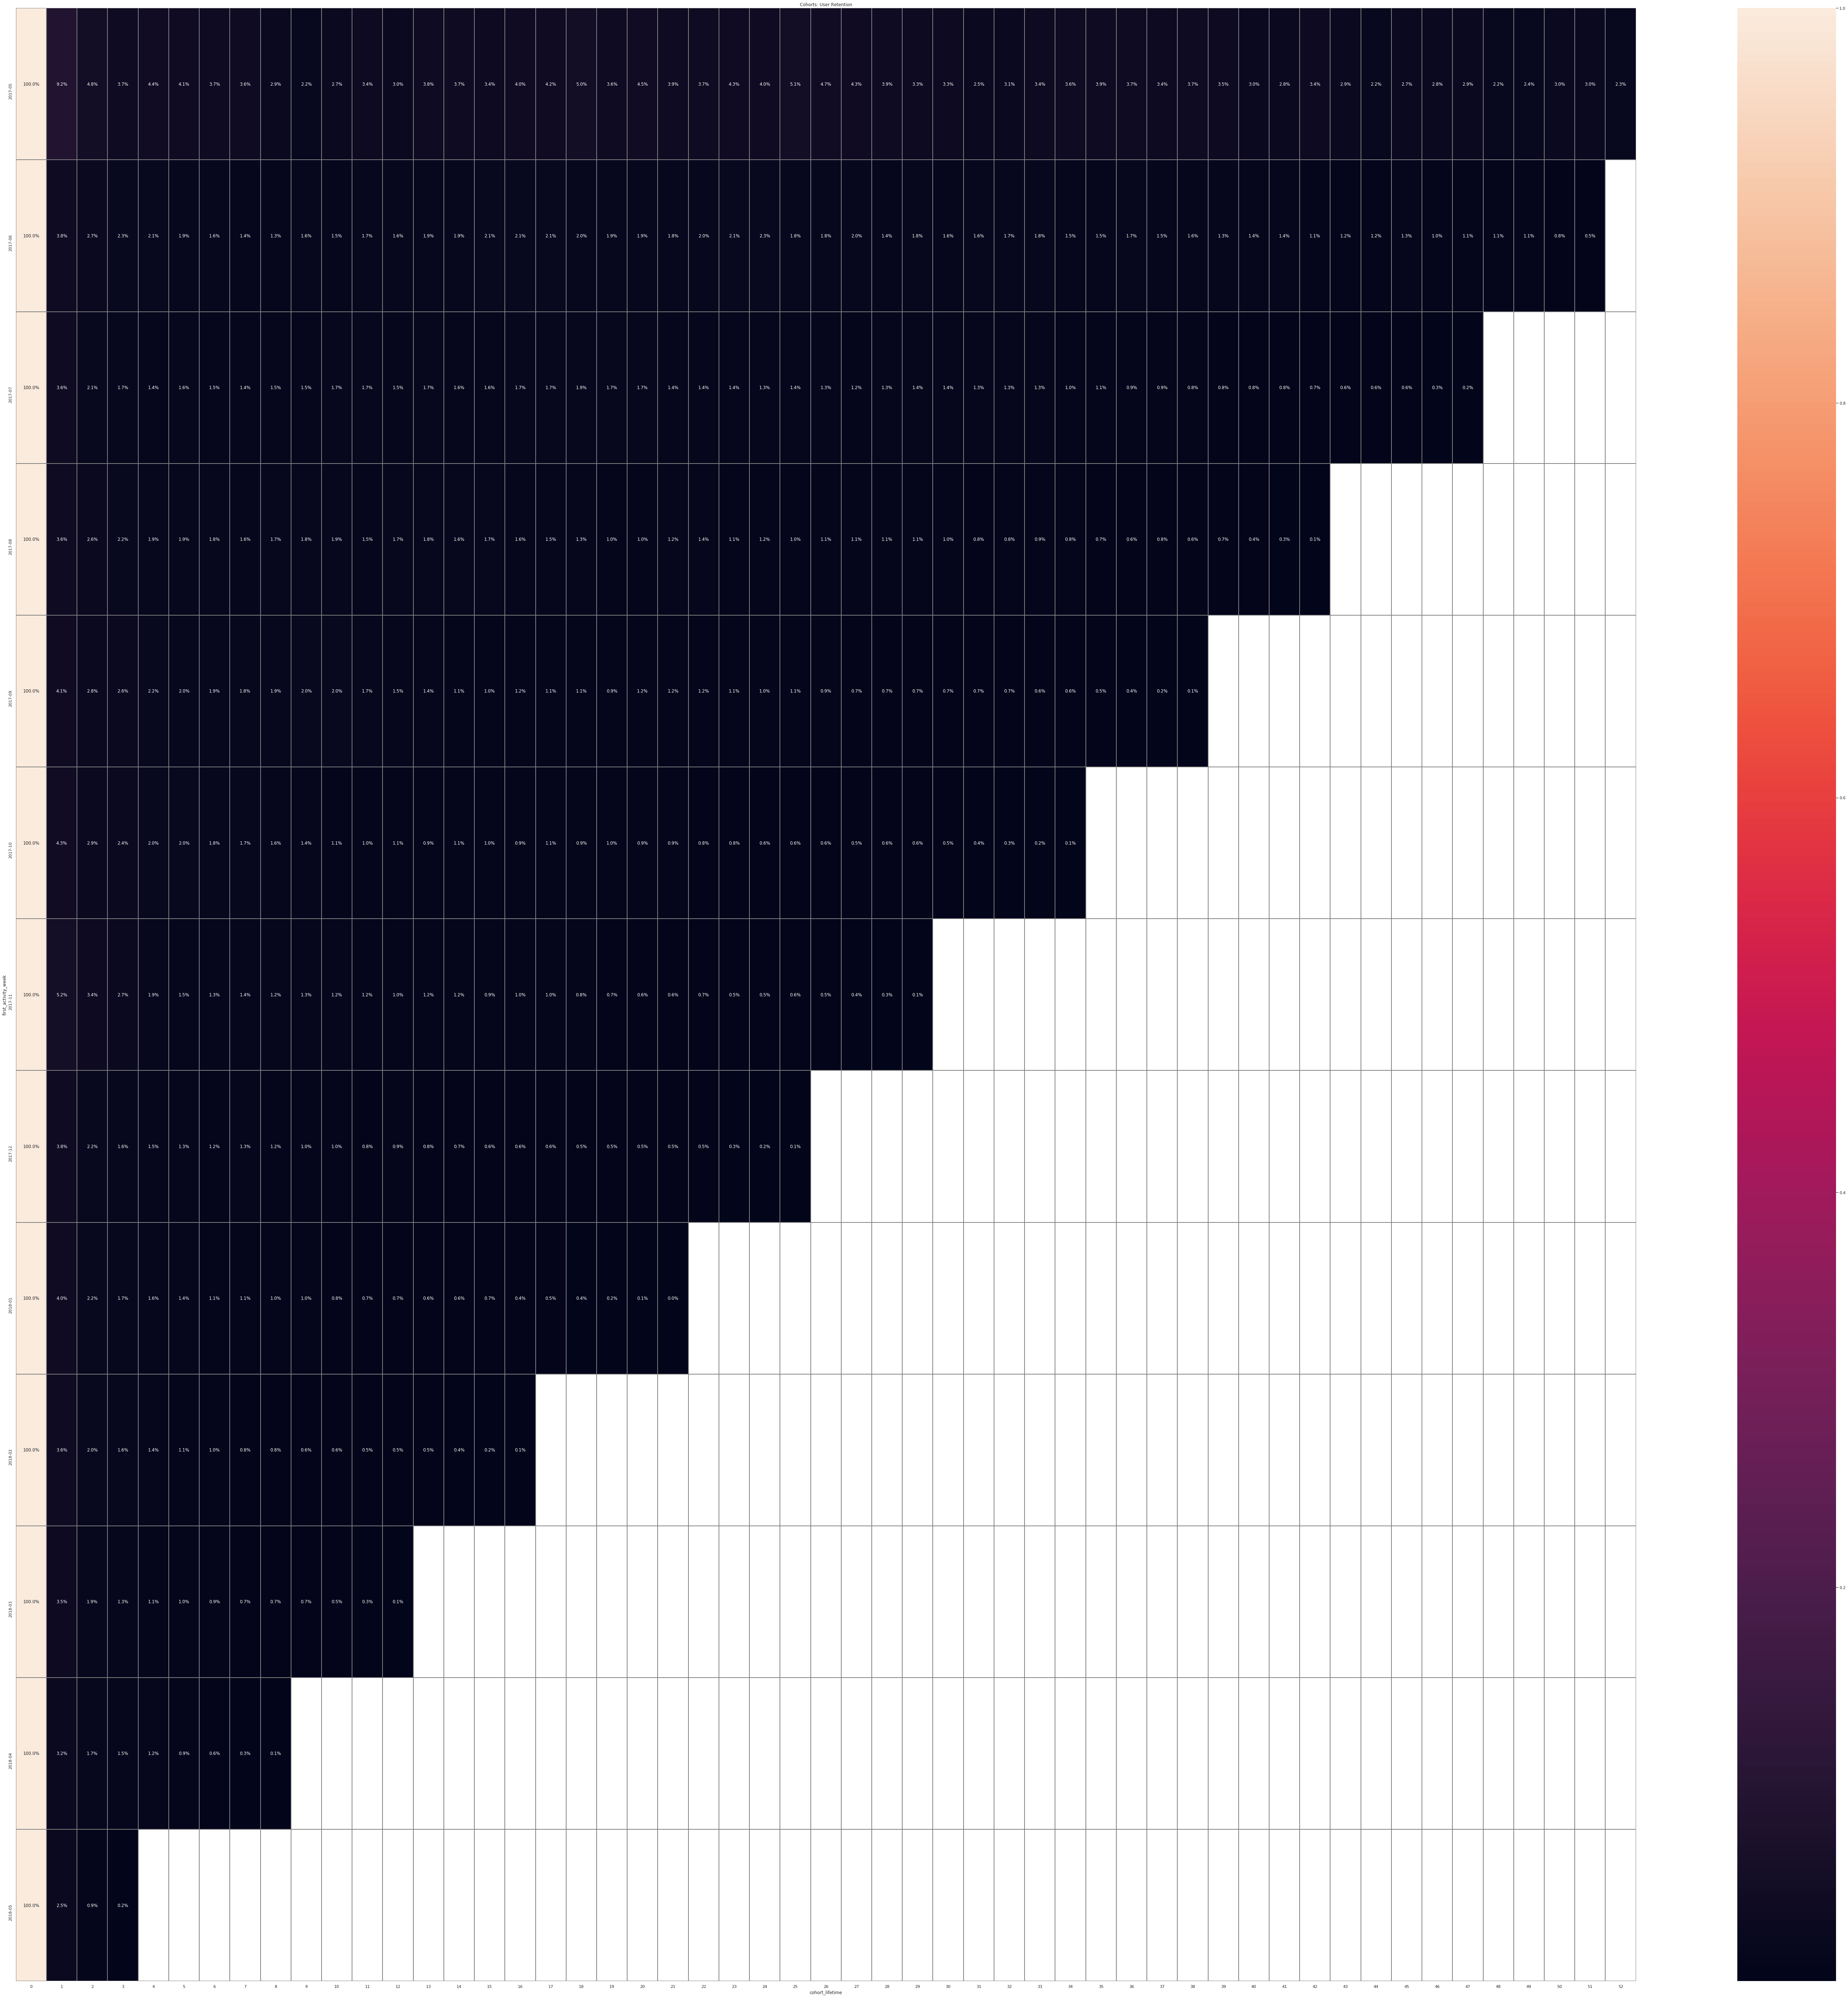

In [21]:
retention_pivot = cohorts.pivot_table(index='first_activity_week',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot
sns.set(style='white')
plt.figure(figsize=(100, 100))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.001%', linewidths=1, linecolor='gray');


С 2017 года по 2018 процент возврата клиентов постепенно уменьшалось с (10% на 05.17 до 2,5% на 05.18). Явно нужно вводить политику направленную на возврат клиенту (оповещения/ бонусы за возврат)


Найдем когда начинают покупать (время между началом сессии и оформленным заказом)

In [ ]:
df_visits = df_visits.merge(df_orders, on = 'Uid')
first_activity_date = df_visits.groupby(['Uid'])['Start Ts'].min()
first_order_date = df_orders.groupby(['Uid'])['Buy Ts'].min()
first_activity_date.name = 'first_activity_date'
first_order_date.name = 'first_order_date'
first_order_date
df_time = first_activity_date.to_frame().join(first_order_date, on = 'Uid')
df_time['time_to_buy'] = df_time['first_order_date'] - df_time['first_activity_date']
print(df_time['time_to_buy'].median())

Около 16 минут уходит на выбор и оформление покупки (но есть и выбросы до 100 дней)

In [23]:
#print(df_time.head(10))

Найдем сколько покупок (в среднем) совершают и средний чек по месяцам

In [24]:
df_orders = df_orders.join(first_order_date, on='Uid')
print(df_orders.head(10))

               Buy Ts  Revenue                   Uid    first_order_date
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00
5 2017-06-01 08:43:00     0.18  10402394430196413321 2017-06-01 08:43:00
6 2017-06-01 08:54:00     1.83  12464626743129688638 2017-06-01 08:54:00
7 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00
8 2017-06-01 09:22:00     3.30  17542070709969841479 2017-06-01 09:22:00
9 2017-06-01 09:23:00     0.37   1074355127080856382 2017-06-01 09:23:00


In [25]:
df_orders['order_month'] = df_orders['Buy Ts'].astype('datetime64[M]')
df_orders['first_order_month'] = df_orders['first_order_date'].astype('datetime64[M]')

In [26]:
#cohort_grouped = df_orders.groupby('first_order_month').agg({'Uid':'nunique','Revenue':'mean'})
cohort_grouped = df_orders.groupby('first_order_month').agg({'Uid':'count','Revenue':'mean'})
print(cohort_grouped)

                    Uid   Revenue
first_order_month                
2017-06-01         4438  5.414982
2017-07-01         2910  5.542241
2017-08-01         2188  5.304506
2017-09-01         3878  8.941805
2017-10-01         6005  4.596744
2017-11-01         5900  4.423558
2017-12-01         5894  5.681327
2018-01-01         4308  3.867950
2018-02-01         4470  3.747315
2018-03-01         4484  4.298263
2018-04-01         2690  4.390561
2018-05-01         3249  4.286168
2018-06-01            1  3.420000


In [27]:
print('Средний чек = ',cohort_grouped['Revenue'].mean())
print('Количество заказов (в среднем) = ',cohort_grouped['Uid'].mean())

Средний чек =  4.916570816865529
Количество заказов (в среднем) =  3878.076923076923


Средник чек по всем месяцам около 5. В летние месяцы (июль, август) количество заказов значительно меньше (примерно на 30%-40% ), что скорее всего обусловленно периодом отпусков. Пик обусловлен как раз выходом из подобного периода


Найдём LTV. для этого к уже имеющимся данным необходимо посчитать количество новых покупателей за месяц, маржинальность примем 1 - т.к. себестоимость у билетов 0 (т.е. будем считать данные во фрейме - валовой прибылью)

In [28]:
cohort_sizes = df_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
#print(cohort_sizes.head())

In [29]:
print(df_orders.head())

               Buy Ts  Revenue                   Uid    first_order_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  order_month first_order_month  
0  2017-06-01        2017-06-01  
1  2017-06-01        2017-06-01  
2  2017-06-01        2017-06-01  
3  2017-06-01        2017-06-01  
4  2017-06-01        2017-06-01  


In [30]:
cohorts = df_orders.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
#print(cohorts.head())

In [31]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
#print(report.head())

In [32]:
margin_rate = 1
report['gp'] = report['Revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
#print(report.head())

Данные подготовлены к расчёту LTV. После расчёта данные визуализируем в виде сводной таблицы

In [33]:
report['ltv'] = report['gp'] / report['n_buyers']
output = report[(report['age']<= 6)].pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round()
    
output.fillna('')

age,0,1,2,3,4,5,6
first_order_month,,,,,,,
2017-06-01,5.0,0,0,1,1,1,1
2017-07-01,6.0,0,1,0,0,0,0
2017-08-01,5.0,0,0,0,0,0,0
2017-09-01,6.0,1,1,4,0,1,1
2017-10-01,5.0,1,0,0,0,0,0
2017-11-01,5.0,0,0,0,0,0,0
2017-12-01,5.0,0,1,1,0,0,
2018-01-01,4.0,0,0,0,0,,
2018-02-01,4.0,0,0,0,,,


Посчитаем итоговый Ltv для когорт с временем жизни оне менее 6 месяцев

In [34]:
ltv_1 = output.loc['2017-06-01'].sum()
ltv_2 = output.loc['2017-07-01'].sum()
ltv_3 = output.loc['2017-08-01'].sum()
ltv_4 = output.loc['2017-09-01'].sum()
ltv_5 = output.loc['2017-10-01'].sum()
ltv_6 = output.loc['2017-11-01'].sum()
print('В среднем покупатели из 1 когорты принсли выручки - ', ltv_1)
print('В среднем покупатели из 2 когорты принсли выручки - ',ltv_2)
print('В среднем покупатели из 3 когорты принсли выручки - ',ltv_3)
print('В среднем покупатели из 4 когорты принсли выручки - ',ltv_4)
print('В среднем покупатели из 5 когорты принсли выручки - ',ltv_5)
print('В среднем покупатели из 6 когорты принсли выручки - ',ltv_6)

В среднем покупатели из 1 когорты принсли выручки -  9.0
В среднем покупатели из 2 когорты принсли выручки -  7.0
В среднем покупатели из 3 когорты принсли выручки -  5.0
В среднем покупатели из 4 когорты принсли выручки -  14.0
В среднем покупатели из 5 когорты принсли выручки -  6.0
В среднем покупатели из 6 когорты принсли выручки -  5.0


Сильно выделяется на фоне остальных 14 когорта. В ней покупки совершали практически каждый месяц (не считая 1)


Перходим к маркетингу, сколько потратили всего/по месяцам/ по источника

In [35]:
#df_costs['source_id'].unique()

In [36]:
print('Всего потрачено - ',df_costs['costs'].sum())

Всего потрачено -  329131.62


In [37]:
#df_costs_source = df_costs.groupby('source_id').sum()
df_costs_source = df_costs.groupby(['source_id'])['costs'].sum()
print('Распределение затрат по источникам')
#df_costs_source = df_costs_source.reset_index()
#df_costs_source.columns = ['Source Id', 'costs']
df_costs_source

Распределение затрат по источникам


source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

На 3 источник кто-то явно не жалел бюджет

In [38]:
df_costs['month'] = df_costs['dt'].astype('datetime64[M]')
month_grouped = df_costs.groupby('month').agg({'costs':'sum'})
print(month_grouped)

               costs
month               
2017-06-01  18015.00
2017-07-01  18240.59
2017-08-01  14790.54
2017-09-01  24368.91
2017-10-01  36322.88
2017-11-01  37907.88
2017-12-01  38315.35
2018-01-01  33518.52
2018-02-01  32723.03
2018-03-01  30415.27
2018-04-01  22289.38
2018-05-01  22224.27


Посчитаем сколько стоило привлечение одного покупателя из каждого источника

In [39]:
df_visits = df_visits.loc[df_visits['Source Id'] != 7]
source_grouped = df_visits.groupby(['Source Id'])['Uid'].count()
#source_grouped.name = 'uid_count'
#source_grouped = df_visits.groupby('Source Id').agg({'Uid':'nunique'})
#source_grouped = source_grouped.reset_index()
#source_grouped.columns = ['Source Id', 'uid_count']
source_grouped

Source Id
1     248662
2     238297
3      46766
4      62683
5     151824
9       9547
10      4027
Name: Uid, dtype: int64

"Всплыл" источник № 7 - информации о котором нет в фрейме с затратами. Убрали его, в дальнейших расчётах не понадобиться

In [40]:
value_per_unit =  df_costs_source/source_grouped
value_per_unit.name = 'value_per_unit'
print (value_per_unit)

source_id
1     0.083781
2     0.179633
3     3.021888
4     0.974325
5     0.340902
9     0.577929
10    1.445863
Name: value_per_unit, dtype: float64


Самый дорогой по привлечению на 1 покупателя - 3 источник

Посчитаем окупились ли затраты по каждому источнику

In [41]:
#month_rev = df_orders.groupby('Uid').agg({'Revenue': 'sum'}).reset_index()
#print(month_rev)

In [42]:
df_visits.head(1)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,activity_week,first_activity_week,cohort_lifetime,Buy Ts,Revenue
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-05-14 10:59:00,2018-03,10,2018-03-09 20:25:00,2.33


In [43]:
#month_rev = df_visits.groupby('Source Id').agg({'Revenue' : 'sum'}).reset_index()
month_rev_source = df_visits.groupby(['Source Id'])['Revenue'].sum()
#df_costs_source
#month_rev

In [44]:
month_roi = (month_rev_source - df_costs_source) / df_costs_source
month_roi

Source Id
1     109.313944
2      60.631237
3       1.099381
4       7.132649
5      21.827344
9       5.586736
10      1.510821
dtype: float64

Самый высокоприбыльный источник - 1 . По 3 источнику точно необходимо принимать какие-торешения. В него больше всего уходит средств.

Перейдём к анализу по платформам

In [45]:
device_grouped = df_visits.groupby(['Device'])['Uid'].count()
device_grouped

Device
desktop    713191
touch       48615
Name: Uid, dtype: int64

In [51]:
df_rev_device = df_visits.groupby(['Device'])['Revenue'].sum()
df_rev_per_user_device = df_rev_device / device_grouped
print('Прибыль с 1 пользователя в зависимости от вида устройства', df_rev_per_user_device)

Прибыль с 1 пользователя в зависимости от вида устройства Device
desktop     9.040906
touch      10.579314
dtype: float64


# Вывод

На платфому очень редко возвращаются за повторными покупками (специально не трогал цвета в тепловой карте, черный - хорошее отражения траура по этой метрике). Есть необходимость в проведении активности для повторного привлечения старых покупателей.  
При анализе источников привлечения пользователей выяснилось следующее :  
Источники под номерами 1 и 2 показали высокий показатель окупаемости  (109 и 60 соответсвенно), особенно выделился ист. №1 вложения в него были далеко не самыми высокими.  
Привлечение через источник № 3, скорее всего необходимо прекращать. При огромных затратах на него(по сравнению со всеми остальными источниками) окупаемость вышла практически нулевая.  
По платформам прибыльность с пользователей как desktop так и с touch примерно одинаковая. Но с desktop заходят на 1,5 порядка больше пользователей